# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


In [1]:
# Import all the required libraries 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


#import stopwords and text processing libraries



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#import machine learning libraries





# Basic EDA on cnbc_headlines dataset

In [3]:
# Read csv file of cnbc headlines using pandas
raw_data_cnbc = pd.read_csv("C:/Users/KIIT/Desktop/Data Science Exercise/CloudyML/Assignments/2. ML for Data Science/Datasets/Sentiment Analysis/cnbc_headlines.csv")
df_cnbc = raw_data_cnbc.copy()

In [4]:
df_cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [5]:
# check the shape of cnbc headline dataset
df_cnbc.shape

(3080, 3)

In [6]:
# Check all the columns in the cnbc headline dataset
df_cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [7]:
# Check which columns are having categorical, numerical or boolean values
df_cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [8]:
# Check for missing values in all the columnns of cnbc headline dataset
df_cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [9]:
 # drop nan values in cnbc headline dataset
df_cnbc = df_cnbc.dropna()

In [10]:
# drop the duplicate rows in the dataset keep the first one
df_cnbc = df_cnbc.drop_duplicates(keep='first')
df_cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [11]:
# check the shape of cnbc headline dataset
df_cnbc.shape

(2800, 3)

# Basic EDA on Gaurdian headlines dataset

In [12]:
# Read csv file of gaurdian headlines using pandas
raw_data_gd = pd.read_csv('C:/Users/KIIT/Desktop/Data Science Exercise/CloudyML/Assignments/2. ML for Data Science/Datasets/Sentiment Analysis/guardian_headlines.csv')
df_gd = raw_data_gd.copy()

In [13]:
df_gd.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [14]:
#check the shape of gaurdian headline dataset
df_gd.shape

(17800, 2)

In [15]:
#check columns of gaurdian headline
df_gd.columns

Index(['Time', 'Headlines'], dtype='object')

In [16]:
# Check which columns are having categorical, numerical or boolean values
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [17]:
# check null values in gaurdian headlines dataset
df_gd.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [18]:
# drop duplicate rows in headlines and keep the first one
print(df_gd.shape)
df_gd = df_gd.drop_duplicates()
print(df_gd.shape)

(17800, 2)
(17800, 2)


# Basic EDA on reuters headlines

In [19]:
# Read csv file of reuters headlines using using pandas
raw_data_r = pd.read_csv('C:/Users/KIIT/Desktop/Data Science Exercise/CloudyML/Assignments/2. ML for Data Science/Datasets/Sentiment Analysis/reuters_headlines.csv')
df_r = raw_data_r.copy()

In [20]:
df_r.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [21]:
#check the shape of reuters headlines dataset
df_r.shape

(32770, 3)

In [22]:
#check the columns of reuters headline dataset
df_r.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [23]:
# Check which columns are having categorical, numerical or boolean values
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [24]:
# Check for missing values in all the columnns of reuters headlines dataset
df_r.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [25]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
print(df_r.shape)
df_r = df_r.drop_duplicates()
print(df_r.shape)

(32770, 3)
(32715, 3)


#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [26]:
# create a function for preprocessing 
from nltk.stem import PorterStemmer
def SentimentPreprocessing(x):
    
  #convert all to lowercase
    x = x.lower()
    
  #remove puntuations
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    x = tokenizer.tokenize(x)
    x = ' '.join([i for i in x])

  #remove stopword
    stop_words = set(stopwords.words('english'))
  
    x = word_tokenize(x)
  
    x = [w for w in x if not w in stop_words]
    x = ' '.join([i for i in x])
  
  #stemming
    ps = PorterStemmer()
    x = ps.stem(x)

  #lemmitizing
    x = nltk.word_tokenize(x)
    lemmatizer = WordNetLemmatizer()
    x = ' '.join([lemmatizer.lemmatize(i) for i in x])
    return x


  

# Sentiment Intensity Analyzer

In [27]:
# import sentiment intensity analyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer



# create sentiment intensity analyzer object
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
#function to  decide sentiment as positive, negative and neutral
def SentimentDecision(x):
    a = sia.polarity_scores(x)
    if a['compound'] >= 0.05 :
        return "Positive"
 
    elif a['compound'] <= - 0.05 :
        return "Negative"
 
    else :
        return "Neutral"

# Now working with description on datasets

In [29]:
# concatenate cnbc headlines dataset and reuters headline dataset
dfcr = pd.concat([df_cnbc, df_r], axis = 0)
dfcr = dfcr.reset_index()
dfcr = dfcr.drop('index', axis = 1)
dfcr

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [30]:
#check the shape of this new dataset
dfcr.shape

(35515, 3)

In [31]:
#make a copy of new dataset 
df = dfcr.copy() 

In [32]:
# apply preprocessing to the description of new dataset
df['Description'] = df['Description'].apply(lambda x: SentimentPreprocessing(x))


In [33]:
df

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightning round...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earnings non covid company lancet publishe...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo join closing bell t...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high quality company going lower ev...
...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian government ruling party tuesday deni...
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday searched volksw...
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announced approved scien...
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin delivery spare engine...


In [34]:
# analyze polarity score of values in description and  add new column of it in dataset
df['polarity score'] = df['Description'].apply(lambda x:SentimentDecision(x))

In [35]:
# apply the function  which decides sentiment to  polarity score column
df

,Headlines,Time,Description,polarity score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightning round...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earnings non covid company lancet publishe...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo join closing bell t...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high quality company going lower ev...,Negative
...,...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian government ruling party tuesday deni...,Negative
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday searched volksw...,Positive
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announced approved scien...,Negative
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin delivery spare engine...,Negative


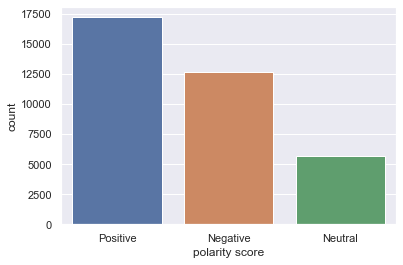

In [36]:
# plot a count plot on description score column
import seaborn as sns
sns.set()
sns.countplot(x = df['polarity score'])
plt.show()

In [37]:
df['polarity score'].value_counts().index

Index(['Positive', 'Negative', 'Neutral'], dtype='object')

In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

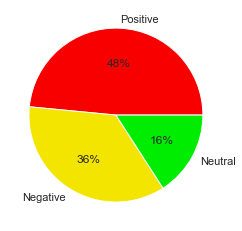

In [38]:
# pie chart on description score column
palette_color = sns.color_palette('nipy_spectral_r')
plt.pie(df['polarity score'].value_counts(), labels=df['polarity score'].value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [39]:
df

,Headlines,Time,Description,polarity score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightning round...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earnings non covid company lancet publishe...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo join closing bell t...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high quality company going lower ev...,Negative
...,...,...,...,...
35510,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian government ruling party tuesday deni...,Negative
35511,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday searched volksw...,Positive
35512,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announced approved scien...,Negative
35513,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin delivery spare engine...,Negative


In [40]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
from sklearn.model_selection import train_test_split
X = df['Description']
y = df['polarity score']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.9, random_state = 212)

LINEAR SUPPORT VECTOR MACHINE


In [41]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


pipe = Pipeline([('Vectorizer', TfidfVectorizer()), ('linearsvc', LinearSVC())])

# Fit the pipeline to the data
pipe.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe.predict(X_test)
# print accuracy score
print(pipe.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))

80.71509009009009
[[1121   69   88]
 [  97  293  140]
 [  88   50 1606]]
              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87      1278
     Neutral       0.71      0.55      0.62       530
    Positive       0.88      0.92      0.90      1744

    accuracy                           0.85      3552
   macro avg       0.82      0.78      0.80      3552
weighted avg       0.84      0.85      0.85      3552

Wall time: 1.95 s


LOGISTIC REGRESSION


In [42]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('linearsvc', LogisticRegression())])
# fit the pipeline to the train data
pipe.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe.predict(X_test)
# print accuracy score
print(pipe.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))
 

D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.95382882882883
[[1087   49  142]
 [  90  227  213]
 [ 103   30 1611]]
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85      1278
     Neutral       0.74      0.43      0.54       530
    Positive       0.82      0.92      0.87      1744

    accuracy                           0.82      3552
   macro avg       0.80      0.73      0.75      3552
weighted avg       0.82      0.82      0.81      3552

Wall time: 5.23 s


MULTINOMIAL NAIVE BAYES


In [43]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('multinb', MultinomialNB())])
# fit the pipeline to the train data
pipe.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe.predict(X_test)
# print accuracy score
print(pipe.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))
 
 

78.26576576576578
[[ 701    2  575]
 [  61   14  455]
 [ 119    1 1624]]
              precision    recall  f1-score   support

    Negative       0.80      0.55      0.65      1278
     Neutral       0.82      0.03      0.05       530
    Positive       0.61      0.93      0.74      1744

    accuracy                           0.66      3552
   macro avg       0.74      0.50      0.48      3552
weighted avg       0.71      0.66      0.60      3552

Wall time: 1.8 s


BERNOULLI NAIVE BAYES


In [44]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB
from sklearn.naive_bayes import BernoulliNB
pipe = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('bernoullinb', BernoulliNB())])
# fit the pipeline to the train data
pipe.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe.predict(X_test)
# print accuracy score
print(pipe.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))


71.90315315315316
[[ 920   78  280]
 [ 100  184  246]
 [ 263   93 1388]]
              precision    recall  f1-score   support

    Negative       0.72      0.72      0.72      1278
     Neutral       0.52      0.35      0.42       530
    Positive       0.73      0.80      0.76      1744

    accuracy                           0.70      3552
   macro avg       0.65      0.62      0.63      3552
weighted avg       0.69      0.70      0.69      3552

Wall time: 1.24 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [45]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('gbc', GradientBoostingClassifier())])
# fit the pipeline to the train data
pipe.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe.predict(X_test)
# print accuracy score
print(pipe.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))


75.33783783783784
[[ 705   16  557]
 [  20   40  470]
 [  84   11 1649]]
              precision    recall  f1-score   support

    Negative       0.87      0.55      0.68      1278
     Neutral       0.60      0.08      0.13       530
    Positive       0.62      0.95      0.75      1744

    accuracy                           0.67      3552
   macro avg       0.69      0.52      0.52      3552
weighted avg       0.71      0.67      0.63      3552

Wall time: 1min 17s


XGBOOST CLASSIFICATION MODEL


In [46]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
from xgboost.sklearn import XGBClassifier
pipe = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('xgbclassifier', XGBClassifier())])
# fit the pipeline to the train data
pipe.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe.predict(X_test)
# print accuracy score
print(pipe.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))


D:\Softwares\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:19:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
77.33671171171171
[[ 963   70  245]
 [  31  289  210]
 [ 112   58 1574]]
              precision    recall  f1-score   support

    Negative       0.87      0.75      0.81      1278
     Neutral       0.69      0.55      0.61       530
    Positive       0.78      0.90      0.83      1744

    accuracy                           0.80      3552
   macro avg       0.78      0.73      0.75      3552
weighted avg       0.80      0.80      0.79      3552

Wall time: 52.3 s


DECISION TREE CLASSIFICATION MODEL


In [47]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('dtc', DecisionTreeClassifier())])
# fit the pipeline to the train data
pipe.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe.predict(X_test)
# print accuracy score
print(pipe.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))

72.2972972972973
[[ 882  108  288]
 [  79  358   93]
 [ 319   97 1328]]
              precision    recall  f1-score   support

    Negative       0.69      0.69      0.69      1278
     Neutral       0.64      0.68      0.66       530
    Positive       0.78      0.76      0.77      1744

    accuracy                           0.72      3552
   macro avg       0.70      0.71      0.70      3552
weighted avg       0.72      0.72      0.72      3552

Wall time: 24.2 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [48]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('knn', KNeighborsClassifier())])
# fit the pipeline to the train data
pipe.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe.predict(X_test)
# print accuracy score
print(pipe.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))

59.909909909909906
[[ 792  114  372]
 [ 164  156  210]
 [ 432  186 1126]]
              precision    recall  f1-score   support

    Negative       0.57      0.62      0.59      1278
     Neutral       0.34      0.29      0.32       530
    Positive       0.66      0.65      0.65      1744

    accuracy                           0.58      3552
   macro avg       0.52      0.52      0.52      3552
weighted avg       0.58      0.58      0.58      3552

Wall time: 18.6 s


In [49]:
# helper function for comparing models matric
import warnings
warnings.filterwarnings("ignore")
def modelmetric(x):
    
    # the libraries we need
    pipe = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('x', x)])
    # fit the pipeline to the train data
    pipe.fit(X_train, y_train)
    # predict on test dataset
    y_pred = pipe.predict(X_test)
    # print accuracy score
    print(x)
    print(pipe.score(y_test,y_pred)*100)
    #print confusion matrix
 
    #print classification report
    print(classification_report(y_test,y_pred))
    print("---------------------------------------------------------------------------------------")
    # create a dataframe with column matric and metric name as value
   
   
    # then predict on the test set
    

In [50]:
# list of model objects
object_list = [LinearSVC(),
               LogisticRegression(),
               MultinomialNB(),
               BernoulliNB(),
               GradientBoostingClassifier(),
               XGBClassifier(),
               DecisionTreeClassifier(),
               KNeighborsClassifier()]
# list of model names
model_names = ['Linear SVC',
              'Logistic Regression',
              'Multinomial Naive Bayes',
              'Bernoulli Naive Bayes',
              'Gradient Boosting Classifier',
              'XGB Classifier',
              'Decision Tree Classifier',
              'K Neighbors Classifier' 
              ]
# print the comparison of models
for j in object_list:
    modelmetric(j)

LinearSVC()
80.71509009009009
              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87      1278
     Neutral       0.71      0.55      0.62       530
    Positive       0.88      0.92      0.90      1744

    accuracy                           0.85      3552
   macro avg       0.82      0.78      0.80      3552
weighted avg       0.84      0.85      0.85      3552

---------------------------------------------------------------------------------------
LogisticRegression()
81.95382882882883
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85      1278
     Neutral       0.74      0.43      0.54       530
    Positive       0.82      0.92      0.87      1744

    accuracy                           0.82      3552
   macro avg       0.80      0.73      0.75      3552
weighted avg       0.82      0.82      0.81      3552

---------------------------------------------------------------------------------

# working with test dataset

In [51]:
# Perforn the prediction on the test dataset
pipe = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('x', LogisticRegression())])
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
predictions

array(['Negative', 'Negative', 'Positive', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [52]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(predictions)
predictions

,0
0,Negative
1,Negative
2,Positive
3,Neutral
4,Positive
...,...
3547,Negative
3548,Positive
3549,Negative
3550,Positive


In [53]:
df_cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [54]:
df_gd.columns = ['Time', 'Info']
df_gd

,Time,Info
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


In [55]:
df_r

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [56]:
df_r['Info'] = df_r['Headlines']+df_r['Description']
df_r = df_r.drop(['Headlines', 'Description'], axis = 1)
df_r

,Time,Info
0,Jul 18 2020,TikTok considers London and other locations fo...
1,Jul 18 2020,Disney cuts ad spending on Facebook amid growi...
2,Jul 18 2020,Trail of missing Wirecard executive leads to B...
3,Jul 18 2020,Twitter says attackers downloaded data from up...
4,Jul 17 2020,U.S. Republicans seek liability protections as...
...,...,...
32765,Mar 20 2018,Malaysia says never hired British data firm at...
32766,Mar 20 2018,Prosecutors search Volkswagen headquarters in ...
32767,Mar 20 2018,McDonald's sets greenhouse gas reduction targe...
32768,Mar 20 2018,Pratt & Whitney to deliver spare A320neo engin...


# Now working with headlines + description

In [57]:
# merge headlines and description of new dataset and name it info
df_cnbc['Info'] = df_cnbc['Headlines']+df_cnbc['Description']
df_cnbc = df_cnbc.drop(['Headlines', 'Description'], axis = 1)
df_cnbc

,Time,Info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
3,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
4,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
5,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...
...,...,...
3075,"10:15 AM ET Tue, 26 Dec 2017",Markets lack Christmas cheerAccording to Kensh...
3076,"11:12 AM ET Thu, 20 Sept 2018",Cramer Remix: The biggest mistake you can make...
3077,"7:07 PM ET Fri, 22 Dec 2017",Cramer says owning too many stocks and too lit...
3078,"7:07 PM ET Fri, 22 Dec 2017",Cramer: I helped investors through the 2010 fl...


In [58]:
# only keep info and time column . drop all remaining columns
df_new = pd.concat([df_cnbc, df_r, df_gd], axis = 0)
df_new

,Time,Info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
3,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
4,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
5,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


In [59]:
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis = 1)
df_new

,Time,Info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...
...,...,...
53310,17-Dec-17,How investing in solar energy can create a bri...
53311,17-Dec-17,Poundland suppliers hit by insurance downgrade
53312,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
53313,17-Dec-17,Unilever sells household name spreads to KKR f...


In [60]:
# apply preprocessing on info column
df_new['Info'] = df_new['Info'].apply(lambda x: SentimentPreprocessing(x))
df_new

,Time,Info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid 19 vaccine ...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightning round would teradyne mad mone...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earnings even bigge...
3,"4:24 PM ET Fri, 17 July 2020",iq capital ceo keith bliss say tech healthcare...
4,"7:36 PM ET Thu, 16 July 2020",wall street delivered kind pullback waiting ji...
...,...,...
53310,17-Dec-17,investing solar energy create brighter future ...
53311,17-Dec-17,poundland supplier hit insurance downgrad
53312,17-Dec-17,cryptocurrencies city watchdog investigate new...
53313,17-Dec-17,unilever sell household name spread kkr 6bn


In [61]:
# analyze polarity score of values in info and  add new column of it in dataset
df_new['polarity score'] = df_new['Info'].apply(lambda x:SentimentDecision(x))

In [62]:
# apply the function  which decides sentiment to  polarity score column
df_new

,Time,Info,polarity score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid 19 vaccine ...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightning round would teradyne mad mone...,Negative
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earnings even bigge...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capital ceo keith bliss say tech healthcare...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street delivered kind pullback waiting ji...,Negative
...,...,...,...
53310,17-Dec-17,investing solar energy create brighter future ...,Positive
53311,17-Dec-17,poundland supplier hit insurance downgrad,Neutral
53312,17-Dec-17,cryptocurrencies city watchdog investigate new...,Neutral
53313,17-Dec-17,unilever sell household name spread kkr 6bn,Neutral


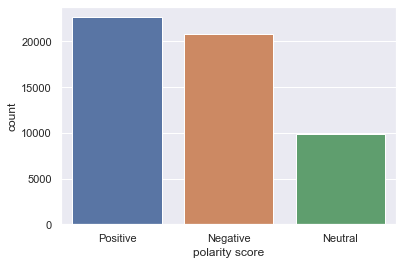

In [63]:
# perform count plot on info_score column
sns.countplot(x = df_new['polarity score'])
plt.show()


In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

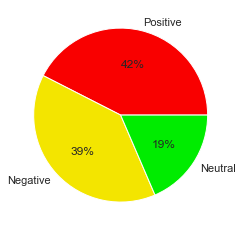

In [64]:
# perform pie chart on info_score column
palette_color = sns.color_palette('nipy_spectral_r')
plt.pie(df_new['polarity score'].value_counts(), labels=df_new['polarity score'].value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [65]:
df_new = df_new.drop('Time', axis = 1)
df_new

,Info,polarity score
0,jim cramer better way invest covid 19 vaccine ...,Positive
1,cramer lightning round would teradyne mad mone...,Negative
2,cramer week ahead big week earnings even bigge...,Positive
3,iq capital ceo keith bliss say tech healthcare...,Positive
4,wall street delivered kind pullback waiting ji...,Negative
...,...,...
53310,investing solar energy create brighter future ...,Positive
53311,poundland supplier hit insurance downgrad,Neutral
53312,cryptocurrencies city watchdog investigate new...,Neutral
53313,unilever sell household name spread kkr 6bn,Neutral


In [66]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
X = df_new['Info']
y = df_new['polarity score']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.9, random_state = 212)

LINEAR SUPPORT VECTOR MACHINE


In [67]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


pipe_LinearSVC = Pipeline([('Vectorizer', TfidfVectorizer()), ('linearsvc', LinearSVC())])

# Fit the pipeline to the data
pipe_LinearSVC.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe_LinearSVC.predict(X_test)
# print accuracy score
print(pipe_LinearSVC.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))



87.35933983495873
[[1858  105  126]
 [ 110  709  137]
 [ 114   82 2091]]
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      2089
     Neutral       0.79      0.74      0.77       956
    Positive       0.89      0.91      0.90      2287

    accuracy                           0.87      5332
   macro avg       0.86      0.85      0.85      5332
weighted avg       0.87      0.87      0.87      5332

Wall time: 3.77 s


LOGISTIC REGRESSION


In [68]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression



pipe_LR = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('linearsvc', LogisticRegression())])
# fit the pipeline to the train data
pipe_LR.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe_LR.predict(X_test)
# print accuracy score
print(pipe_LR.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))
 

84.62115528882221
[[1808  105  176]
 [ 131  647  178]
 [ 145   85 2057]]
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      2089
     Neutral       0.77      0.68      0.72       956
    Positive       0.85      0.90      0.88      2287

    accuracy                           0.85      5332
   macro avg       0.83      0.81      0.82      5332
weighted avg       0.84      0.85      0.84      5332

Wall time: 9.89 s


MULTINOMIAL NAIVE BAYES


In [69]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


pipe_Multi_NB = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('MultinomialNB', MultinomialNB())])
# fit the pipeline to the train data
pipe_Multi_NB.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe_Multi_NB.predict(X_test)
# print accuracy score
print(pipe_Multi_NB.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))
 

76.78169542385596
[[1539    2  548]
 [ 380   37  539]
 [ 270    1 2016]]
              precision    recall  f1-score   support

    Negative       0.70      0.74      0.72      2089
     Neutral       0.93      0.04      0.07       956
    Positive       0.65      0.88      0.75      2287

    accuracy                           0.67      5332
   macro avg       0.76      0.55      0.51      5332
weighted avg       0.72      0.67      0.62      5332

Wall time: 2.27 s


BERNOULLI NAIVE BAYES


In [70]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe_Bernoulli_NB = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('BernoulliNB', BernoulliNB())])
# fit the pipeline to the train data
pipe_Bernoulli_NB.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe_Bernoulli_NB.predict(X_test)
# print accuracy score
print(pipe_Bernoulli_NB.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))
 

19.298574643660913
[[1519  208  362]
 [ 167  542  247]
 [ 412  279 1596]]
              precision    recall  f1-score   support

    Negative       0.72      0.73      0.73      2089
     Neutral       0.53      0.57      0.55       956
    Positive       0.72      0.70      0.71      2287

    accuracy                           0.69      5332
   macro avg       0.66      0.66      0.66      5332
weighted avg       0.69      0.69      0.69      5332

Wall time: 2.3 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [71]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier


pipe_GradientBoostingClassifier = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('GradientBoostingClassifier', GradientBoostingClassifier())])
# fit the pipeline to the train data
pipe_GradientBoostingClassifier.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe_GradientBoostingClassifier.predict(X_test)
# print accuracy score
print(pipe_GradientBoostingClassifier.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))
 
 

73.1245311327832
[[1626   39  424]
 [ 539  142  275]
 [ 519   34 1734]]
              precision    recall  f1-score   support

    Negative       0.61      0.78      0.68      2089
     Neutral       0.66      0.15      0.24       956
    Positive       0.71      0.76      0.73      2287

    accuracy                           0.66      5332
   macro avg       0.66      0.56      0.55      5332
weighted avg       0.66      0.66      0.63      5332

Wall time: 2min 43s


XGBOOST CLASSIFICATION MODEL


In [72]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pipe_XGBClassifier = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('XGBClassifier', XGBClassifier())])
# fit the pipeline to the train data
pipe_XGBClassifier.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe_XGBClassifier.predict(X_test)
# print accuracy score
print(pipe_XGBClassifier.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))


[16:28:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
79.87621905476368
[[1622  223  244]
 [  80  757  119]
 [ 192  215 1880]]
              precision    recall  f1-score   support

    Negative       0.86      0.78      0.81      2089
     Neutral       0.63      0.79      0.70       956
    Positive       0.84      0.82      0.83      2287

    accuracy                           0.80      5332
   macro avg       0.78      0.80      0.78      5332
weighted avg       0.81      0.80      0.80      5332

Wall time: 1min 33s


DECISION TREE CLASSIFICATION MODEL


In [73]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier


pipe_DecisionTreeClassifier = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('DecisionTreeClassifier', DecisionTreeClassifier())])
# fit the pipeline to the train data
pipe_DecisionTreeClassifier.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe_DecisionTreeClassifier.predict(X_test)
# print accuracy score
print(pipe_DecisionTreeClassifier.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))


74.13728432108027
[[1544  154  391]
 [ 113  705  138]
 [ 420  163 1704]]
              precision    recall  f1-score   support

    Negative       0.74      0.74      0.74      2089
     Neutral       0.69      0.74      0.71       956
    Positive       0.76      0.75      0.75      2287

    accuracy                           0.74      5332
   macro avg       0.73      0.74      0.74      5332
weighted avg       0.74      0.74      0.74      5332

Wall time: 57.7 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [74]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier


pipe_KNeighborsClassifier = Pipeline([('countvectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('KNeighborsClassifier', KNeighborsClassifier())])
# fit the pipeline to the train data
pipe_KNeighborsClassifier.fit(X_train, y_train)
# predict on test dataset
y_pred = pipe_KNeighborsClassifier.predict(X_test)
# print accuracy score
print(pipe_KNeighborsClassifier.score(y_test,y_pred)*100)
#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
#print classification report
print(classification_report(y_test,y_pred))


55.64516129032258
[[1373  259  457]
 [ 394  326  236]
 [ 714  305 1268]]
              precision    recall  f1-score   support

    Negative       0.55      0.66      0.60      2089
     Neutral       0.37      0.34      0.35       956
    Positive       0.65      0.55      0.60      2287

    accuracy                           0.56      5332
   macro avg       0.52      0.52      0.52      5332
weighted avg       0.56      0.56      0.55      5332

Wall time: 19.1 s


In [75]:
# helper function for comparing models matric

    # the libraries we need

    # create a dataframe with column matric and metric name as value

    # then predict on the test set
for j in object_list:
    modelmetric(j)  
    

LinearSVC()
87.35933983495873
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      2089
     Neutral       0.79      0.74      0.77       956
    Positive       0.89      0.91      0.90      2287

    accuracy                           0.87      5332
   macro avg       0.86      0.85      0.85      5332
weighted avg       0.87      0.87      0.87      5332

---------------------------------------------------------------------------------------
LogisticRegression()
84.62115528882221
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      2089
     Neutral       0.77      0.68      0.72       956
    Positive       0.85      0.90      0.88      2287

    accuracy                           0.85      5332
   macro avg       0.83      0.81      0.82      5332
weighted avg       0.84      0.85      0.84      5332

---------------------------------------------------------------------------------

In [76]:
# list of model objects

# list of model names

# print the comparison of models


# Prediction with test data

In [77]:
# Perforn the prediction on the test dataset
predictions = pipe_LinearSVC.predict(X_test)
predictions

array(['Positive', 'Negative', 'Positive', ..., 'Negative', 'Negative',
       'Positive'], dtype=object)

In [78]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(predictions)

In [79]:
predictions

,0
0,Positive
1,Negative
2,Positive
3,Negative
4,Negative
...,...
5327,Negative
5328,Positive
5329,Negative
5330,Negative


In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8735933983495874

#  Explicit Prediction

In [81]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = pipe_LinearSVC.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [82]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = pipe_LinearSVC.predict(sent2)
y_predict

array(['Positive'], dtype=object)

In [83]:
sent3 = ["Indian Rupee support at 78.80-78.50 against US Dollar; ECB, BoJ monetary policies to guide currency movement"]
y_predict = pipe_LinearSVC.predict(sent3)
print(y_predict[0])

Positive
